In [1]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import geopandas as gpd
import pandas as pd
import psycopg2


plt.style.use("ggplot")
conn_string = os.environ["DATABASE_CONNECTION"]
conn = psycopg2.connect(conn_string)

practices = pd.read_sql("SELECT * FROM practices ORDER BY program", conn)
huc8 = gpd.read_postgis("SELECT * FROM huc8", conn, "geometry")

In [2]:
practices

,id,huc_8,huc_12,state,county_code,county,nrcs_practice_code,practice_name,program,fund_code,applied_amount,practice_units,applied_date,funding
0,7777,05080001,050800010805,Ohio,NaN,MIAMI,WQL06,Apply controlled release nitrogen fertilizer,CSP,None,100.2,ac,2010.0,NaN
1,7779,07050007,070500070706,Wisconsin,NaN,CHIPPEWA,WQL06,Apply controlled release nitrogen fertilizer,CSP,None,1250.0,ac,2010.0,NaN
2,7780,07040008,070400080403,Minnesota,NaN,FILLMORE,WQL06,Apply controlled release nitrogen fertilizer,CSP,None,354.0,ac,2010.0,NaN
3,7781,10230005,102300050102,Iowa,NaN,BUENA VISTA,WQL06,Apply controlled release nitrogen fertilizer,CSP,None,1242.7,ac,2010.0,NaN
4,7782,07010205,070102050304,Minnesota,NaN,MCLEOD,WQL06,Apply controlled release nitrogen fertilizer,CSP,None,440.7,ac,2010.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242970,153683,08050002,080500020402,Arkansas,5017.0,CHICOT,590,Nutrient Management (Ac.),EQIP,CCPI-MRBI- Lower Bayou Macon,1074.7,ac,2015.0,30375.00
242971,153684,08020302,080203020406,Arkansas,5147.0,WOODRUFF,590,Nutrient Management,EQIP,CCPI-MRBI-Middle Cache River,150.0,ac,2015.0,4373.00
242972,153685,08020401,080204010203,Arkansas,5069.0,JEFFERSON,590,Nutrient Management,EQIP,Groundwater Decline - Jefferson,80.1,ac,2015.0,2422.22
242973,153686,08020301,080203010306,Arkansas,5117.0,PRAIRIE,590,Nutrient Management,EQIP,Beginning Farmer/Rancher - Statewide,54.5,ac,2015.0,1648.08


Text(0, 0.5, 'Count')

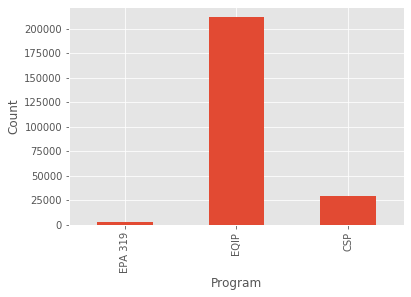

In [3]:
ax = practices["program"].value_counts(sort=False).plot(kind="bar")
ax.set_xlabel("Program")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

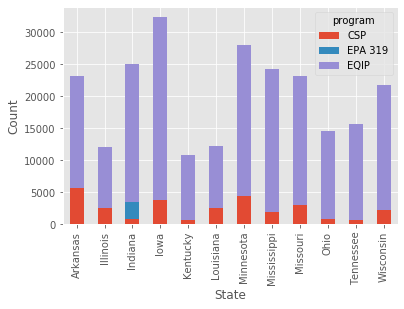

In [4]:
ax = practices.groupby(["state", "program"]).size().unstack().plot(kind="bar", stacked=True)
ax.set_xlabel("State")
ax.set_ylabel("Count")

Text(0, 0.5, 'Funding')

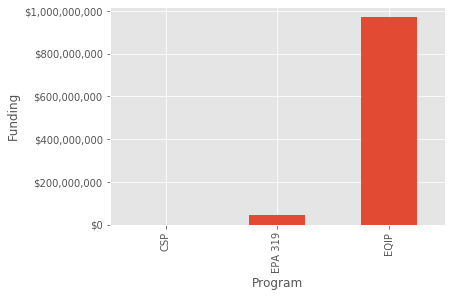

In [5]:
programs = practices.groupby("program")
ax = programs.sum()["funding"].plot(kind="bar")
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: f"${int(x):,}"))
ax.set_xlabel("Program")
ax.set_ylabel("Funding")